Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 96.67%



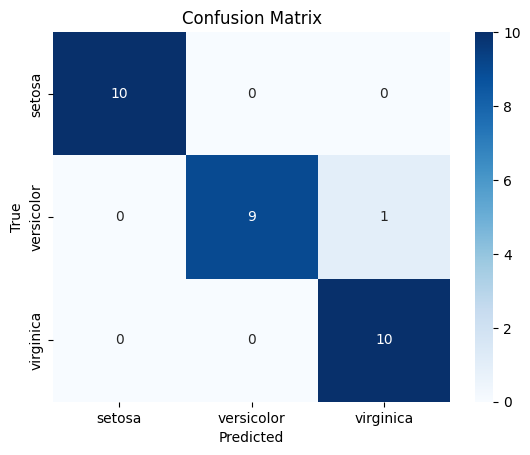


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [14]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hyperparameter tuning for RBF SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


In [ ]:
import numpy as np

# Example new sample: [sepal length, sepal width, petal length, petal width]
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # shape (1,4)

# Standardize using the same scaler as training
new_sample_scaled = sc.transform(new_sample)

# Predict using the trained model (e.g., SVM)
predicted_class = best_model.predict(new_sample_scaled)

# Get class name
class_name = iris.target_names[predicted_class[0]]
print("Predicted class:", class_name)


Predicted class: setosa
